# My Google Fit Data Analysis
## 1. Explanation
This project uses and describe basic consepts of data analysis: cleaning, exploring and visualization. The raw data are taken from Google Fit Application which I installed on my phone at September 2019 to push myself to do some sports. After three-four months of using it I became interested in results, effectiveness and the way I do my everyday sprot activities: have I become more sportive, how much time I invest in sport, am I committed to sport and what it the best kind of sport for me?

To answer all this questions I decided to make some kind of exloration. 

First we download all nesaccery Google Fit data from Google's Takeout system. I installed the application on the 26 of September 2019 and downloaded files on the 10 of Jenuary 2020. So now we have several number of files for each day of given period and the file with agregated data. We will work with the last one as it has all information for given period we need.

Now let's start with importing necessery modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

## 2. Data description
We start to work with the large merged file which contains all data about my everyday activities during the period. First we need to read data from the file.

In [2]:
data = pd.read_csv('data-file.csv', index_col=0)

Let's take a quick first look at our data.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 2019-09-26 to 2020-01-10
Data columns (total 24 columns):
Сalories (kсal)                107 non-null float64
Distance (m)                   103 non-null float64
Height (m)                     0 non-null float64
Min. latitude (deg.)           96 non-null float64
Min. longitude (deg.)          96 non-null float64
Max. latitude (deg.)           96 non-null float64
Max. longitude (deg.)          96 non-null float64
Average Speed (m/s)            104 non-null float64
Max. Speed (m/s)               104 non-null float64
Min. Speed (m/s)               104 non-null float64
Number of Steps                104 non-null float64
Average weight (kg)            13 non-null float64
Max. weight (kg)               13 non-null float64
Min. weight (kg)               13 non-null float64
Active Minutes                 102 non-null float64
Heart Beats                    0 non-null float64
Duration: Rest (ms)            105 non-null float64
Duration: W

We see that our data set has 107 rows and 25 columns (including index column). We have pritty many empty cells. Some data are absent at all (like Height and Heart Points). 

Let's look at the data describe attribute to find more information about data.

In [4]:
data.describe()

,Сalories (kсal),Distance (m),Height (m),Min. latitude (deg.),Min. longitude (deg.),Max. latitude (deg.),Max. longitude (deg.),Average Speed (m/s),Max. Speed (m/s),Min. Speed (m/s),...,Active Minutes,Heart Beats,Duration: Rest (ms),Duration: Walking (ms),Duration: Running (ms),Duration: Calisthenics (ms),Duration: Gymnastics (ms),Duration: Pilates (ms),Duration: Sleeping (ms),Duration: Swimming (ms)
count,107.000000,103.000000,0.0,96.000000,96.000000,96.000000,96.000000,104.000000,104.000000,104.000000,...,102.000000,0.0,1.050000e+02,1.010000e+02,5.000000,1.300000e+01,1.0,5.000000e+00,1.900000e+01,1.600000e+01
mean,1648.170348,4465.401157,NaN,31.799465,35.214844,31.824572,35.238889,0.996355,8.083480,0.217354,...,90.764706,NaN,7.333369e+07,4.707852e+06,281016.200000,9.162645e+05,900000.0,1.056000e+06,2.179260e+07,1.837500e+06
std,238.818508,2426.933312,NaN,0.022207,0.079869,0.025090,0.063870,0.475089,8.303201,0.132692,...,42.847456,NaN,1.293024e+07,2.329546e+06,172330.106739,8.378034e+05,NaN,1.878297e+05,8.194162e+06,5.123475e+05
min,324.868709,9.826136,NaN,31.742452,34.617171,31.774349,34.622534,0.436250,1.108203,0.000000,...,2.000000,NaN,1.848000e+07,5.019520e+05,61073.000000,2.000000e+05,900000.0,9.000000e+05,7.200000e+06,1.200000e+06
25%,1544.358495,2821.447066,NaN,31.780372,35.212726,31.821689,35.244564,0.766807,1.964478,0.121201,...,59.750000,NaN,7.375936e+07,3.074177e+06,183111.000000,2.220000e+05,900000.0,9.000000e+05,1.440000e+07,1.800000e+06
50%,1673.183445,4473.924888,NaN,31.815897,35.233095,31.821911,35.245387,0.887309,3.716286,0.249973,...,92.500000,NaN,7.746978e+07,4.767889e+06,253237.000000,3.174380e+05,900000.0,9.600000e+05,2.520000e+07,1.800000e+06
75%,1762.068786,6152.173435,NaN,31.819018,35.239595,31.825062,35.249137,1.064180,11.598887,0.271170,...,121.000000,NaN,8.091524e+07,6.153867e+06,440998.000000,1.902000e+06,900000.0,1.260000e+06,2.700000e+07,1.800000e+06
max,2194.633801,12104.869270,NaN,31.821598,35.249090,32.055741,35.253858,4.709789,35.490002,0.686688,...,203.000000,NaN,8.640000e+07,1.179509e+07,466662.000000,2.205000e+06,900000.0,1.260000e+06,3.359944e+07,3.600000e+06


Also we want to look at the beggining and the end of the data table.

In [5]:
data.head()

,Сalories (kсal),Distance (m),Height (m),Min. latitude (deg.),Min. longitude (deg.),Max. latitude (deg.),Max. longitude (deg.),Average Speed (m/s),Max. Speed (m/s),Min. Speed (m/s),...,Active Minutes,Heart Beats,Duration: Rest (ms),Duration: Walking (ms),Duration: Running (ms),Duration: Calisthenics (ms),Duration: Gymnastics (ms),Duration: Pilates (ms),Duration: Sleeping (ms),Duration: Swimming (ms)
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-26,431.428830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-27,1395.000117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-28,1505.759783,2658.836670,NaN,NaN,NaN,NaN,NaN,0.750452,2.580289,0.606683,...,62.0,NaN,18480000.0,3600000.0,NaN,200000.0,NaN,NaN,7200000.0,NaN
2019-09-29,1787.540328,4473.924888,NaN,31.821543,35.243939,31.821620,35.244203,1.166897,17.951780,0.269737,...,123.0,NaN,44918785.0,5230153.0,NaN,200000.0,NaN,900000.0,25200000.0,NaN
2019-09-30,1817.690831,3987.500187,NaN,31.817901,35.231550,31.821853,35.243561,0.796446,3.730000,0.002617,...,102.0,NaN,51663563.0,3986253.0,NaN,860000.0,NaN,960000.0,28800000.0,NaN


In [6]:
data.tail()

,Сalories (kсal),Distance (m),Height (m),Min. latitude (deg.),Min. longitude (deg.),Max. latitude (deg.),Max. longitude (deg.),Average Speed (m/s),Max. Speed (m/s),Min. Speed (m/s),...,Active Minutes,Heart Beats,Duration: Rest (ms),Duration: Walking (ms),Duration: Running (ms),Duration: Calisthenics (ms),Duration: Gymnastics (ms),Duration: Pilates (ms),Duration: Sleeping (ms),Duration: Swimming (ms)
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,1921.049252,7301.161566,NaN,31.779429,35.212727,31.825082,35.249150,0.905146,10.552080,0.279371,...,144.0,NaN,74849217.0,6793511.0,NaN,NaN,NaN,NaN,NaN,1800000.0
2020-01-07,1677.162270,5454.047414,NaN,31.818694,35.239157,31.824846,35.249629,0.878158,2.329754,0.254764,...,91.0,NaN,79563852.0,5687006.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,1551.151425,3394.152417,NaN,31.779370,35.212679,31.826098,35.249133,0.765691,1.914187,0.289004,...,55.0,NaN,80417712.0,3147247.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-09,1795.048996,8175.571581,NaN,31.780405,35.212677,31.824972,35.249306,0.852816,10.112185,0.214588,...,137.0,NaN,74418423.0,8062998.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-10,324.868709,NaN,NaN,31.818685,35.249090,31.818755,35.249128,NaN,NaN,NaN,...,NaN,NaN,20120902.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now as we know how our data looks like, we can start to clean and explore it.
## 3. Preparing data
### 3.1. Cleaning
As we've said before, the data start from 9th of September 2019 and end on the 10th of Jenuary 2020. We want to explor data exactly for three month period from the 1st of October till the end of the year. So we need to delete extra lines.

In [7]:
data.drop(data.head(5).index, inplace=True)
data.drop(data.tail(10).index, inplace=True)

data.head()

,Сalories (kсal),Distance (m),Height (m),Min. latitude (deg.),Min. longitude (deg.),Max. latitude (deg.),Max. longitude (deg.),Average Speed (m/s),Max. Speed (m/s),Min. Speed (m/s),...,Active Minutes,Heart Beats,Duration: Rest (ms),Duration: Walking (ms),Duration: Running (ms),Duration: Calisthenics (ms),Duration: Gymnastics (ms),Duration: Pilates (ms),Duration: Sleeping (ms),Duration: Swimming (ms)
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-01,1647.837634,387.676403,NaN,NaN,NaN,NaN,NaN,0.956698,1.234390,0.624996,...,37.0,NaN,50134858.0,510918.0,NaN,317438.0,NaN,1260000.0,25200000.0,NaN
2019-10-02,1595.639992,2944.880515,NaN,31.749575,35.209094,31.820887,35.244745,0.881290,12.681112,0.073621,...,75.0,NaN,50521385.0,3585815.0,NaN,NaN,NaN,NaN,25200000.0,NaN
2019-10-03,1809.347297,3844.128188,NaN,31.818870,35.240115,31.825135,35.248335,1.338693,1.832370,0.334109,...,95.0,NaN,55337236.0,3822764.0,NaN,240000.0,NaN,NaN,25200000.0,1800000.0
2019-10-04,1899.603784,8248.763862,NaN,31.773488,35.219833,31.821658,35.244167,1.057343,2.670444,0.249572,...,171.0,NaN,42067629.0,9997458.0,NaN,NaN,NaN,NaN,31260000.0,NaN
2019-10-05,1566.282852,1679.827522,NaN,31.780028,35.207667,31.780526,35.208966,1.309730,13.861970,0.472434,...,54.0,NaN,47164570.0,2158509.0,NaN,222000.0,900000.0,NaN,33599436.0,NaN


Also we don't need some columns in out data set, because they are not relevant to the research. Let's make a list of all columns' names to know what we are talking about.

In [8]:
data.columns

Index(['Сalories (kсal)', 'Distance (m)', 'Height (m)', 'Min. latitude (deg.)',
       'Min. longitude (deg.)', 'Max. latitude (deg.)',
       'Max. longitude (deg.)', 'Average Speed (m/s)', 'Max. Speed (m/s)',
       'Min. Speed (m/s)', 'Number of Steps', 'Average weight (kg)',
       'Max. weight (kg)', 'Min. weight (kg)', 'Active Minutes', 'Heart Beats',
       'Duration: Rest (ms)', 'Duration: Walking (ms)',
       'Duration: Running (ms)', 'Duration: Calisthenics (ms)',
       'Duration: Gymnastics (ms)', 'Duration: Pilates (ms)',
       'Duration: Sleeping (ms)', 'Duration: Swimming (ms)'],
      dtype='object')

As we saw in data info, columns 'Height' and 'Heart Beats' are empty. We will not work with geographic data in this analysis, so we don't need columns with latitude and lonitude. We don't want to discuss weight, so we delete all columns with this data. And we don't need column with time of rest and sleepping, because we talk about sport, not about free time.

In [9]:
data.drop(['Height (m)', 'Min. latitude (deg.)', 'Min. longitude (deg.)', 'Max. latitude (deg.)', 'Max. longitude (deg.)', 
           'Average weight (kg)','Max. weight (kg)', 'Min. weight (kg)', 'Duration: Rest (ms)', 'Duration: Sleeping (ms)',
           'Heart Beats'], axis=1, inplace=True)

data.head()

,Сalories (kсal),Distance (m),Average Speed (m/s),Max. Speed (m/s),Min. Speed (m/s),Number of Steps,Active Minutes,Duration: Walking (ms),Duration: Running (ms),Duration: Calisthenics (ms),Duration: Gymnastics (ms),Duration: Pilates (ms),Duration: Swimming (ms)
Date,,,,,,,,,,,,,
2019-10-01,1647.837634,387.676403,0.956698,1.234390,0.624996,1043.0,37.0,510918.0,NaN,317438.0,NaN,1260000.0,NaN
2019-10-02,1595.639992,2944.880515,0.881290,12.681112,0.073621,5939.0,75.0,3585815.0,NaN,NaN,NaN,NaN,NaN
2019-10-03,1809.347297,3844.128188,1.338693,1.832370,0.334109,6255.0,95.0,3822764.0,NaN,240000.0,NaN,NaN,1800000.0
2019-10-04,1899.603784,8248.763862,1.057343,2.670444,0.249572,14816.0,171.0,9997458.0,NaN,NaN,NaN,NaN,NaN
2019-10-05,1566.282852,1679.827522,1.309730,13.861970,0.472434,3116.0,54.0,2158509.0,NaN,222000.0,900000.0,NaN,NaN


Next we add real index column to the data frame.

In [10]:
data.reset_index(inplace=True)

Now as we deleted unnesaccery rows and columns, we can look again at the data info.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 14 columns):
Date                           92 non-null object
Сalories (kсal)                92 non-null float64
Distance (m)                   91 non-null float64
Average Speed (m/s)            92 non-null float64
Max. Speed (m/s)               92 non-null float64
Min. Speed (m/s)               92 non-null float64
Number of Steps                92 non-null float64
Active Minutes                 90 non-null float64
Duration: Walking (ms)         89 non-null float64
Duration: Running (ms)         5 non-null float64
Duration: Calisthenics (ms)    10 non-null float64
Duration: Gymnastics (ms)      1 non-null float64
Duration: Pilates (ms)         3 non-null float64
Duration: Swimming (ms)        14 non-null float64
dtypes: float64(13), object(1)
memory usage: 10.2+ KB


The data frame has 92 rows: three months, two with 31 days in them (Oktober and December) and one with 30 days (November). And 15 columns with data we want to explore.

But before exploration start we have to do some more work.

### 3.2. Formatting

We need to convert type of Date row to Datetime format.

In [12]:
data['Date'] = pd.to_datetime(data['Date'])

Also we want to fill all NaN (empty) values with 0. It's nesaccery for further analysis and visualization.

In [13]:
data.fillna(0, inplace=True)

And we need to convert some data from one units to another. For example, it's not comfortable to work with time in milliseconds. It's much more common to deal with minutes. For the same reason we'll convert meters per second to kilometers per hour. Respectively we'll change column names to match them to data types.

In [14]:
data['Сalories (kсal)'] = (data['Сalories (kсal)'] // 1).astype(int)
data['Distance (m)'] = (data['Distance (m)'] // 1).astype(int)
data['Average Speed (m/s)'] = round(data['Average Speed (m/s)'] * 3600 / 1000, 1)
data['Max. Speed (m/s)'] = round(data['Max. Speed (m/s)'] * 3600 / 1000, 1)
data['Min. Speed (m/s)'] = round(data['Min. Speed (m/s)'] * 3600 / 1000, 1)
data['Number of Steps'] = data['Number of Steps'].astype(int)
data['Active Minutes'] = data['Active Minutes'].astype(int)
data['Duration: Walking (ms)'] = (data['Duration: Walking (ms)'] // 1000 // 60).astype(int)
data['Duration: Running (ms)'] = (data['Duration: Running (ms)'] // 1000 // 60).astype(int)
data['Duration: Calisthenics (ms)'] = (data['Duration: Calisthenics (ms)'] // 1000 // 60).astype(int)
data['Duration: Gymnastics (ms)'] = (data['Duration: Gymnastics (ms)'] // 1000 // 60).astype(int)
data['Duration: Pilates (ms)'] = (data['Duration: Pilates (ms)'] // 1000 // 60).astype(int)
data['Duration: Swimming (ms)'] = (data['Duration: Swimming (ms)'] // 1000 // 60).astype(int)

data.rename({'Average Speed (m/s)': 'Average Speed (km/h)', 'Max. Speed (m/s)': 'Max Speed (km/h)', 
            'Min. Speed (m/s)': 'Min Speed (km/h)', 'Duration: Rest (ms)': 'Duration: Rest (m)', 
            'Duration: Rest (ms)': 'Duration: Rest (min)', 'Duration: Walking (ms)': 'Duration: Walking (min)',
            'Duration: Running (ms)': 'Duration: Running (min)', 'Duration: Calisthenics (ms)': 'Duration: Calisthenics (min)',
            'Duration: Gymnastics (ms)': 'Duration: Gymnastics (min)', 'Duration: Pilates (ms)': 'Duration: Pilates (min)',
            'Duration: Swimming (ms)': 'Duration: Swimming (min)'}, axis=1, inplace=True)

Now our set of data looks much more better.

In [15]:
data.head()

,Date,Сalories (kсal),Distance (m),Average Speed (km/h),Max Speed (km/h),Min Speed (km/h),Number of Steps,Active Minutes,Duration: Walking (min),Duration: Running (min),Duration: Calisthenics (min),Duration: Gymnastics (min),Duration: Pilates (min),Duration: Swimming (min)
0,2019-10-01,1647,387,3.4,4.4,2.2,1043,37,8,0,5,0,21,0
1,2019-10-02,1595,2944,3.2,45.7,0.3,5939,75,59,0,0,0,0,0
2,2019-10-03,1809,3844,4.8,6.6,1.2,6255,95,63,0,4,0,0,30
3,2019-10-04,1899,8248,3.8,9.6,0.9,14816,171,166,0,0,0,0,0
4,2019-10-05,1566,1679,4.7,49.9,1.7,3116,54,35,0,3,15,0,0


## 3.3. Inserting additional column

In our data analysis we work with dates. It's useful to add column with days of weeks to data frame. 

In [16]:
data['Day of Week'] = data['Date'].dt.dayofweek

In [17]:
data.head()

,Date,Сalories (kсal),Distance (m),Average Speed (km/h),Max Speed (km/h),Min Speed (km/h),Number of Steps,Active Minutes,Duration: Walking (min),Duration: Running (min),Duration: Calisthenics (min),Duration: Gymnastics (min),Duration: Pilates (min),Duration: Swimming (min),Day of Week
0,2019-10-01,1647,387,3.4,4.4,2.2,1043,37,8,0,5,0,21,0,1
1,2019-10-02,1595,2944,3.2,45.7,0.3,5939,75,59,0,0,0,0,0,2
2,2019-10-03,1809,3844,4.8,6.6,1.2,6255,95,63,0,4,0,0,30,3
3,2019-10-04,1899,8248,3.8,9.6,0.9,14816,171,166,0,0,0,0,0,4
4,2019-10-05,1566,1679,4.7,49.9,1.7,3116,54,35,0,3,15,0,0,5


So we see in the last column numbers which correlates with days of week. We see that our data begin from Tuesday, because Monday has index 0. But numbers instead of day's names are not very useful. So we replace day numbers with their names.

In [18]:
days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['Day of Week'].replace(days_of_week, inplace=True)
data.head()

,Date,Сalories (kсal),Distance (m),Average Speed (km/h),Max Speed (km/h),Min Speed (km/h),Number of Steps,Active Minutes,Duration: Walking (min),Duration: Running (min),Duration: Calisthenics (min),Duration: Gymnastics (min),Duration: Pilates (min),Duration: Swimming (min),Day of Week
0,2019-10-01,1647,387,3.4,4.4,2.2,1043,37,8,0,5,0,21,0,Tuesday
1,2019-10-02,1595,2944,3.2,45.7,0.3,5939,75,59,0,0,0,0,0,Wednesday
2,2019-10-03,1809,3844,4.8,6.6,1.2,6255,95,63,0,4,0,0,30,Thursday
3,2019-10-04,1899,8248,3.8,9.6,0.9,14816,171,166,0,0,0,0,0,Friday
4,2019-10-05,1566,1679,4.7,49.9,1.7,3116,54,35,0,3,15,0,0,Saturday


And change columns order.

In [19]:
data.columns

Index(['Date', 'Сalories (kсal)', 'Distance (m)', 'Average Speed (km/h)',
       'Max Speed (km/h)', 'Min Speed (km/h)', 'Number of Steps',
       'Active Minutes', 'Duration: Walking (min)', 'Duration: Running (min)',
       'Duration: Calisthenics (min)', 'Duration: Gymnastics (min)',
       'Duration: Pilates (min)', 'Duration: Swimming (min)', 'Day of Week'],
      dtype='object')

In [20]:
cols = ['Date', 'Day of Week', 'Сalories (kсal)', 'Distance (m)', 'Average Speed (km/h)',
       'Max Speed (km/h)', 'Min Speed (km/h)', 'Number of Steps',
       'Active Minutes', 'Duration: Walking (min)', 'Duration: Running (min)',
       'Duration: Calisthenics (min)', 'Duration: Gymnastics (min)',
       'Duration: Pilates (min)', 'Duration: Swimming (min)']
data = data[cols]
data.head()

,Date,Day of Week,Сalories (kсal),Distance (m),Average Speed (km/h),Max Speed (km/h),Min Speed (km/h),Number of Steps,Active Minutes,Duration: Walking (min),Duration: Running (min),Duration: Calisthenics (min),Duration: Gymnastics (min),Duration: Pilates (min),Duration: Swimming (min)
0,2019-10-01,Tuesday,1647,387,3.4,4.4,2.2,1043,37,8,0,5,0,21,0
1,2019-10-02,Wednesday,1595,2944,3.2,45.7,0.3,5939,75,59,0,0,0,0,0
2,2019-10-03,Thursday,1809,3844,4.8,6.6,1.2,6255,95,63,0,4,0,0,30
3,2019-10-04,Friday,1899,8248,3.8,9.6,0.9,14816,171,166,0,0,0,0,0
4,2019-10-05,Saturday,1566,1679,4.7,49.9,1.7,3116,54,35,0,3,15,0,0


## 4. Exploring data
### 4.1. General indicators
Now our data are clean and ready for exploration. We start with general indicators of activity: Calories, Distance, Number of staps and Active Minutes. First we draw simple plot graphics for them.

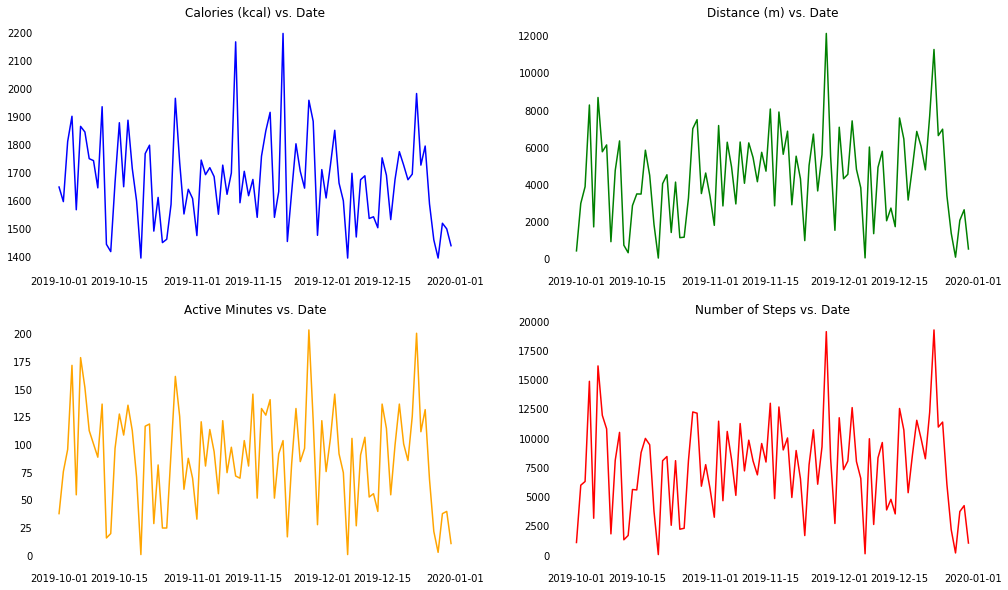

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(17,10))
columns = ['Сalories (kсal)', 'Distance (m)', 'Active Minutes', 'Number of Steps']
colors = ['blue', 'green', 'orange', 'red']
ind = 0
for i in range(2):
    for j in range(2):
        axs[i, j].plot(data['Date'], data[columns[ind]], c=colors[ind])
        axs[i, j].set_title(columns[ind] + ' vs. Date')
        axs[i, j].tick_params(bottom=False, top=False, left=False, right=False)
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['bottom'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['left'].set_visible(False)
        ind += 1
plt.show()

We may noticed that plot graphs for all indicators look very similar despite different units of measure. But not exactly. To understand if they really depend on each other we count correlation coefficients.

In [22]:
columns = [data['Сalories (kсal)'], data['Distance (m)'], data['Active Minutes'], data['Number of Steps']]
corr_coef_list = np.zeros((4, 4))
for i in range(len(columns)):
    for j in range(len(columns)):
        corr_coef = np.corrcoef(columns[i], columns[j])
        corr_coef = corr_coef[0][1]
        corr_coef_list[i][j] = corr_coef
        corr_coef_list[j][i] = corr_coef
corr_coef_list

array([[1.        , 0.73514167, 0.83082444, 0.72022761],
       [0.73514167, 1.        , 0.91839872, 0.98554188],
       [0.83082444, 0.91839872, 1.        , 0.93737221],
       [0.72022761, 0.98554188, 0.93737221, 1.        ]])

We see that the highest correlation is between Distance and Number of Steps (0.98). And it is very expectful. Also between Number of Steps and Active Minutes (0.92): as longer my trip - the more time it takes. But not for 100%, because except of time it depends on my speed. The next two indicates that have strong correlation (0.91) are Distance and Active Minutes. And it is very natural from previouce two results.

The smallest correlation is between Calories and Number of Steps (0.72) and also between Calories and Distance (0.73). It's because amount of burned calories depends also on another activities I did.

So let's talk about each indicator a little bit deeper.

### 4.1.1. Calories

In [23]:
data['Сalories (kсal)'].describe()

count      92.000000
mean     1671.021739
std       161.446618
min      1394.000000
25%      1550.750000
50%      1673.000000
75%      1748.750000
max      2194.000000
Name: Сalories (kсal), dtype: float64

I really don't know how Google Fit counts calories I've burned. What's written on its site:
> Google Fit uses a combination of your activity, your gender, your height, and your weight to estimate how many calories you’ve burned.  It's an estimate of total calories burned and includes your basal metabolic rate (BMR), not just calories you burned in your activity.

Anyway amount of calories a person burns should match with amount of calories a person eats. For now we don't have data for calories I recieved. So assume that I eat like an average adult women from 1500 to 2000 calories a day.

We can see then the level of burned calories is within this frame and some times more. So I don’t face either obesity or anorexia. It's a good news. But the average number of burned calories is about 1700. It meens that I need to do more sport if I want to become slimmer.

#### 4.1.2. Distance

In [24]:
data['Distance (m)'].describe()

count       92.000000
mean      4374.010870
std       2492.176962
min          0.000000
25%       2779.250000
50%       4470.500000
75%       6124.250000
max      12104.000000
Name: Distance (m), dtype: float64

The minimum distance was 0. This is logical. Of course it occured that days I stayed at home. And the maximum distance I walked was 12 and a little bit more kilometers. It's pretty many. Let's look when it happened. 

In [25]:
row = data.loc[data['Distance (m)'] == data['Distance (m)'].max()]
row[['Date', 'Day of Week', 'Distance (m)']]

,Date,Day of Week,Distance (m)
58,2019-11-28,Thursday,12104


The 28 of November. Oh, I remember that day. I walked around the Old City in Jerusalem. It was really cool day.

And the one more output from this data is that usually I walk more then four kilometes every day. Not so much, but not so little, ah?

Now let's take a look how many days I staid at home without one step out door. Google Fit count every step I make with the phone in my hand even from bedroom to kitchen. So let's set a cut line with 100 meters. Less then this I cann't walk outdoors.

In [26]:
row = data.loc[data['Distance (m)'] <= 100]
row[['Date', 'Day of Week', 'Distance (m)']]

,Date,Day of Week,Distance (m)
19,2019-10-20,Sunday,0
67,2019-12-07,Saturday,9
88,2019-12-28,Saturday,48


Only three days. And they are Saturdays and Sundy what is very natural.

#### 4.1.3. Number of Steps

In [27]:
data['Number of Steps'].describe()

count       92.000000
mean      7511.576087
std       4061.920913
min         12.000000
25%       4701.750000
50%       8004.500000
75%      10095.000000
max      19205.000000
Name: Number of Steps, dtype: float64

The maximum value is more them 19000 steps a day. And the minimum is 12. Exactly from my room to kitchen.

Ok, let's look at a graph again.

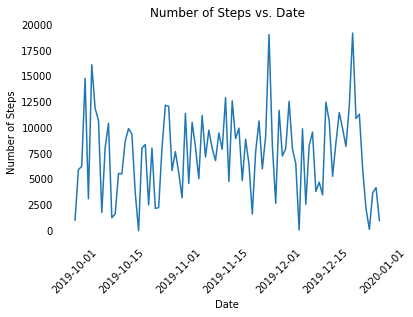

In [28]:
plt.plot(data['Date'], data['Number of Steps'])
plt.title('Number of Steps vs. Date')
plt.xlabel('Date')
plt.ylabel('Number of Steps')
plt.xticks(rotation=45)
plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

The largest amount of data lays between 2500 and 12000 stpes. But there are several days with much more big number. Let's look at them.

In [29]:
steps = data.sort_values(by = 'Number of Steps', ascending = False)
steps[['Date', 'Day of Week', 'Number of Steps']].head()

,Date,Day of Week,Number of Steps
83,2019-12-23,Monday,19205
58,2019-11-28,Thursday,19060
5,2019-10-06,Sunday,16132
3,2019-10-04,Friday,14816
45,2019-11-15,Friday,12941


We see that the 28 of November is again with us. As we remember it's the day with the longest distance I walked.

As you maybe know World Health Organization affirm that we need to walk not less then 10 000 steps every day to be healthy. Let's add to our plot this line.

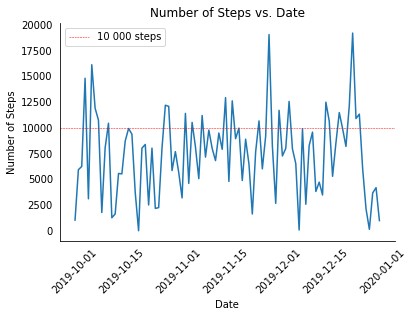

In [30]:
plt.plot(data['Date'], data['Number of Steps'])
plt.title('Number of Steps vs. Date')
plt.xlabel('Date')
plt.ylabel('Number of Steps')
x = pd.to_datetime('2019-10-01')
y = pd.to_datetime('2019-12-31')
plt.axhline(10000, linestyle='--', color='r', label = '10 000 steps', linewidth=0.5)
plt.xticks(rotation=45)
plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='upper left')
plt.show()

And let's count what percentage of days did I fulfilled this condition.

In [31]:
more_then_10000_steps = sum(data['Number of Steps'] > 10000)
print('{}%'.format(more_then_10000_steps / 92 * 100))

25.0%


Not enought, I think. I should work on it.
#### 4.1.4. Active Minutes

In [32]:
data['Active Minutes'].describe()

count     92.000000
mean      88.293478
std       45.031256
min        0.000000
25%       54.750000
50%       91.500000
75%      120.250000
max      203.000000
Name: Active Minutes, dtype: float64

The minimum value in this column is 0 - when I allowed myself to rest. The maximum is 203 minutes, e.g. about three hours. And the average time is an hour and a half.

Let's make a histogram that describes my everyday activity.

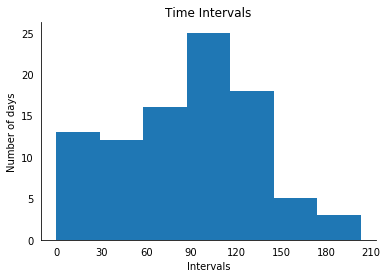

In [33]:
plt.hist(data['Active Minutes'], 7)
plt.xticks(range(0, 240, 30))
plt.title('Time Intervals')
plt.xlabel('Intervals')
plt.ylabel('Number of days')
plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We see that this histogram has almost normal distribution. The most common interval it between 90 and 120 minutes.After two and a half hous number of days L walked so long drops sharply. I never walked more then three hours.

The next interesting question is on which days of week I walk more and on which - less? Does it depend on day of week or not at all?

First we count all sums of minutes per day of week.

In [34]:
active_minutes_per_day_of_week = data.groupby('Day of Week')['Active Minutes'].sum()
active_minutes_per_day_of_week

Day of Week
Friday       1252
Monday       1387
Saturday      489
Sunday       1244
Thursday     1262
Tuesday      1295
Wednesday    1194
Name: Active Minutes, dtype: int32

We see that they groupped without any order. It's not good for our analysis. Let's bring it to usual order.

In [35]:
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
active_minutes_per_day_of_week = active_minutes_per_day_of_week.reindex(days_of_week)
active_minutes_per_day_of_week

Day of Week
Sunday       1244
Monday       1387
Tuesday      1295
Wednesday    1194
Thursday     1262
Friday       1252
Saturday      489
Name: Active Minutes, dtype: int32

Also we may calculate average activity in minutes per day of the week. But we should we accurate: there may be different number of different days of week in a months. So we need to count how many times each day of the week appears in our data.

In [36]:
number_of_days = data['Day of Week'].value_counts()
number_of_days = number_of_days.reindex(days_of_week)
number_of_days

Sunday       13
Monday       13
Tuesday      14
Wednesday    13
Thursday     13
Friday       13
Saturday     13
Name: Day of Week, dtype: int64

And now we may count average active minutes per day of the week.

In [37]:
for day in days_of_week:
    average_active_minutes_per_day_of_week = active_minutes_per_day_of_week // number_of_days
average_active_minutes_per_day_of_week

Day of Week
Sunday        95
Monday       106
Tuesday       92
Wednesday     91
Thursday      97
Friday        96
Saturday      37
dtype: int64

We can draw a graphic that shows this results visually.

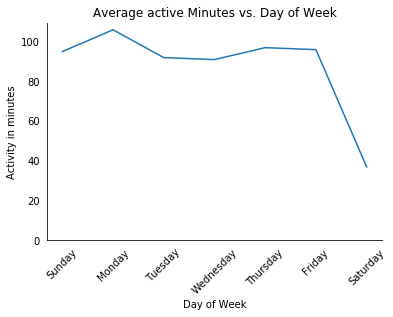

In [38]:
plt.plot(range(7), average_active_minutes_per_day_of_week)
plt.xlabel('Day of Week')
plt.ylabel('Activity in minutes')
plt.title('Average active Minutes vs. Day of Week')
plt.xticks(range(7), days_of_week, rotation='45')
plt.yticks(range(0, 120, 20))
plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

It looks very natural. As many other people I do a lot of stuff on Mondays and prefer to stay at home and rest.

### 4.2. Speed

Let's quickly talk about speed columns in data. We have three of them: average, minimum and maximum ones. 

#### 4.2.1. Average speed

In [39]:
data['Average Speed (km/h)'].describe()

count    92.000000
mean      3.620652
std       1.808560
min       1.600000
25%       2.775000
50%       3.200000
75%       3.825000
max      17.000000
Name: Average Speed (km/h), dtype: float64

We see that the average average speed is 3,6 kilometers per hour. It's normal average speed people arer walking. Nothing strange. Minimum average speed is 1,8 kilometers like we walk around shops. But maximum average speed gives us some strange result: 17 kilometers per hour. Maybe when I tried to catch up a bus.

#### 4.2. Minimum Speed

In [40]:
data['Min Speed (km/h)'].describe()

count    92.000000
mean      0.751087
std       0.470561
min       0.000000
25%       0.400000
50%       0.900000
75%       1.000000
max       2.500000
Name: Min Speed (km/h), dtype: float64

Google devides all speed values into these three groups to give us information about our everyday movement. And for each separate day it makes sense. But now in this form it's not very useful. We just see that minimum speed does not exceed 2.5 kilometers per hour and usually it's value is 0.75 kilometers per hour.

#### 4.3. Maximum Speed

In [41]:
data['Max Speed (km/h)'].describe()

count     92.000000
mean      28.648913
std       30.366691
min        4.000000
25%        6.900000
50%       13.300000
75%       41.725000
max      127.800000
Name: Max Speed (km/h), dtype: float64

Here we have the most strange data. What does it meen: maximum speed 127 kilometers per hour. It's quicker then guepard!

But when we look at all this data together we see that every day speed veries from 0.75 to 28 kilometers (for some seconds) with the average value of 3.6 kilomoters per hour.

### 4.3. Different activities

And now it's time to talk about all different kinds of activities in data I did during that three months to become a little bit more sportive.

We have six of them: walking, running, calisthenics, gymnastics, pilates and swimming. Walking and running Goggle Fit count automatically. For calisthenics, gymnastics and pilates I downloaded special applications that send information to Gogle Fit every time I use them. And data for swimming I added to Google Fit manually.

#### 4.3.1. Proportion

First we want to show a proportion of all kinds of sports according to the total time I spent training.

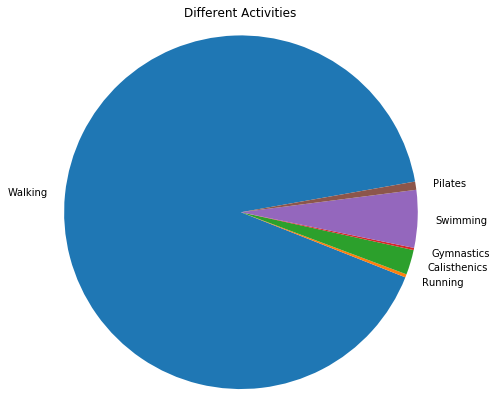

In [42]:
walking = data['Duration: Walking (min)'].sum()
running = data['Duration: Running (min)'].sum()
calisthenics = data['Duration: Calisthenics (min)'].sum()
gymnastics = data['Duration: Gymnastics (min)'].sum()
pilates = data['Duration: Pilates (min)'].sum()
swimming = data['Duration: Swimming (min)'].sum()

activities_array = [walking, running, calisthenics, gymnastics, swimming, pilates]
activities_labels = ['Walking', 'Running', 'Calisthenics', 'Gymnastics', 'Swimming', 'Pilates']

fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(activities_array, labels=activities_labels, startangle=10)
ax.axis('equal')
plt.title('Different Activities')
plt.show()

Impressive, ah? I almost didn't do anything exept just wakling wround. It's more then 75% of all my activities. On the second place is swimming, then a little calisthenics and rhen almost invisible running, gymnastics and pilates.

Ok. It's not the time to be upset. Let's continue.

#### 4.3.2. Walking

We already have talked a lot about it when described distance (in kilometers) and steps (in units). Now we talk exactly about minutes amount of walking. How long time every day I walked.

In [43]:
data['Duration: Walking (min)'].describe()

count     92.000000
mean      75.326087
std       41.268382
min        0.000000
25%       46.500000
50%       75.000000
75%      101.250000
max      196.000000
Name: Duration: Walking (min), dtype: float64

We see that average walking time is 75 minutes in a day. More then an hour. When we go every day to work or store we even don't think how much time we spend on movement from one place to another. But it's important because has an impact on hole our life.

Let's look at the histogram that decribes waoking data. We devide all time into intervals of 30 minutes and explore how many days fall in each of them.

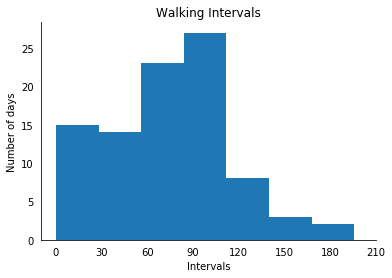

In [44]:
plt.hist(data['Duration: Walking (min)'], 7)
plt.xticks(range(0, 240, 30))
plt.title('Walking Intervals')
plt.xlabel('Intervals')
plt.ylabel('Number of days')
plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

It's very similar to histogram of active minutes and we know reason for it. So the most common interval is from one to two hours. Which correlates with previous result.

#### 4.3.3. Running

I never run for perpose. It's not my kind of sport at all. So it was very strange to see this data in the table. I suppose that Google Fit concider as running that moments whan I try to catch a bus or something like this. Anyway let's look whan and how often it happened.

In [45]:
row = data.loc[data['Duration: Running (min)'] != 0]
row['Date']

47   2019-11-17
54   2019-11-24
65   2019-12-05
68   2019-12-08
80   2019-12-20
Name: Date, dtype: datetime64[ns]

Only five times. Maybe it's a sign that I shall start to run?

#### 4.3.4. Swimming

In [46]:
data['Duration: Swimming (min)'].describe()

count    92.000000
mean      4.347826
std      10.409669
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      30.000000
Name: Duration: Swimming (min), dtype: float64

Swimming is my favorite kind of sport. I suppose that I did it quite hard. Now data look really strange. Average amount of 5 minutes raises questions. Obviously it's because null values. Let's consider only non-null rows in the frame.

In [47]:
swimming = data['Duration: Swimming (min)']
swimming = swimming[swimming != 0]
swimming.describe()

count    14.000000
mean     28.571429
std       3.631365
min      20.000000
25%      30.000000
50%      30.000000
75%      30.000000
max      30.000000
Name: Duration: Swimming (min), dtype: float64

Now it has much more sense. Let's count how many times occures each period of time.

In [48]:
data['Duration: Swimming (min)'].value_counts()

0     78
30    12
20     2
Name: Duration: Swimming (min), dtype: int64

We see that I spend in the swimming pool 20 or 30 minutes. Not so much but better then nothing.

Let's count how many days I swam every months.

In [49]:
swimming_rows = data.loc[data['Duration: Swimming (min)'].isin([20, 30])]
swimmimg_in_months = swimming_rows['Date'].dt.month.value_counts()
swimmimg_in_months

11    8
10    6
Name: Date, dtype: int64

Only six times in October and seven times in November. And never in December. Despite the fact that I paid to the swimming-pool every month. Not so good.

#### 4.3.5. Other activities

Let's look at all of them together and without null values.

In [50]:
calisthenics = data['Duration: Calisthenics (min)']
calisthenics = calisthenics[calisthenics != 0]
calisthenics = calisthenics.describe()

gymnastics = data['Duration: Gymnastics (min)']
gymnastics = gymnastics[gymnastics != 0]
gymnastics = gymnastics.describe()

pilates = data['Duration: Pilates (min)']
pilates = pilates[pilates != 0]
pilates = pilates.describe()

other_activities = [calisthenics, gymnastics, pilates]
other_activities = pd.DataFrame(other_activities)
other_activities

,count,mean,std,min,25%,50%,75%,max
Duration: Calisthenics (min),10.0,17.3,14.757672,3.0,4.0,13.0,31.75,36.0
Duration: Gymnastics (min),1.0,15.0,NaN,15.0,15.0,15.0,15.00,15.0
Duration: Pilates (min),3.0,19.0,3.464102,15.0,18.0,21.0,21.00,21.0


So. I did calisthenics 10 times in three months, pilates three tines and gymnastics only one time about 15-20 minutes every kind of it. It's a failure. I'm frustrated.

## 5. Results and outputs

So we explored data from Google Fit application for the period of three months. We saw which data we have, we cleaned them, reorganized and described. We identified relationships and patterns and drew graphics to illusrate them.

Now we are able to make some conclusions.

1. Every person even he or she is very unsportive do some sports every day one way or another becouse every movement burnes calories in our body.
2. Every person who wants to go in for sports needs strong motivation so as not to give up in a few days.
3. And if you don't have time for sport - just walk. This really may compensat the lack of sports activity in our lives.

Working with data allows us to learn more about the phenomena that surround us, draw scientific conclusions that shed light on what was previously considered unknowable, and help to make informed decisions in all areas of application. That's why I like data and data analysis. I hope to continue my studies and if I find something interesting, I'll share it with people.